In [ ]:
#THEORETICAL 
# K-Nearest Neighbors (KNN) and Principal Component Analysis (PCA)

## 1. What is K-Nearest Neighbors (KNN) and how does it work?

"""
KNN is a supervised machine learning algorithm used for classification and regression.
It works by:
1. Storing all the training data.
2. When making a prediction, it finds the 'K' closest data points (neighbors) to the new data point.
3. For classification, it assigns the class that is most frequent among the neighbors.
4. For regression, it averages the values of the neighbors to make a prediction.
"""

## 2. What is the difference between KNN Classification and KNN Regression?

"""
KNN Classification:
- Predicts the class label based on the majority vote of nearest neighbors.

KNN Regression:
- Predicts a continuous value by averaging the values of nearest neighbors.
"""

## 3. What is the role of the distance metric in KNN?

"""
The distance metric determines how closeness is measured.
Common distance metrics include:
- Euclidean Distance
- Manhattan Distance
- Minkowski Distance

The chosen metric directly affects which neighbors are considered "nearest."
"""

## 4. What is the Curse of Dimensionality in KNN?

"""
As the number of features (dimensions) increases:
- Data points become more spread out.
- All points appear equally distant, reducing the effectiveness of distance-based algorithms like KNN.
- This degrades the model's performance.
"""

## 5. How can we choose the best value of K in KNN?

"""
To find the best K:
- Use techniques like cross-validation.
- Plot error vs. K to find an optimal value.
- A small K can be noisy; a large K can smooth over important details.
"""

## 6. What are KD Tree and Ball Tree in KNN?

"""
Both are data structures used to speed up nearest neighbor search.

- KD Tree: A binary tree that partitions space along data axes (good for low-dimensional data).
- Ball Tree: Uses hyperspheres to partition space (better for high-dimensional data).
"""

## 7. When should you use KD Tree vs. Ball Tree?

"""
- Use KD Tree for low-dimensional data (d < 20).
- Use Ball Tree for higher-dimensional data or when data is not axis-aligned.
"""

## 8. What are the disadvantages of KNN?

"""
- Computationally expensive at prediction time.
- Sensitive to irrelevant features and noisy data.
- Requires feature scaling.
- Doesn’t work well with high-dimensional data (curse of dimensionality).
"""

## 9. How does feature scaling affect KNN?

"""
Feature scaling is crucial for KNN because distance metrics are sensitive to magnitude.

- Without scaling, features with large values dominate the distance calculation.
- Techniques: Standardization (Z-score), Min-Max scaling, etc.
"""

## 10. What is PCA (Principal Component Analysis)?

"""
PCA is a dimensionality reduction technique.
It transforms data into a new coordinate system such that the greatest variance lies on the first coordinate (principal component), and so on.
"""

## 11. How does PCA work?

"""
1. Standardize the data.
2. Compute the covariance matrix.
3. Compute eigenvalues and eigenvectors.
4. Sort eigenvectors by eigenvalues in descending order.
5. Select the top 'k' eigenvectors.
6. Project data onto the new feature space.
"""

## 12. What is the geometric intuition behind PCA?

"""
PCA finds new axes (principal components) that:
- Maximize the variance of the data.
- Are orthogonal (uncorrelated).
- Capture the most information with fewer dimensions.
"""

## 13. What is the difference between Feature Selection and Feature Extraction?

"""
Feature Selection:
- Chooses a subset of original features.
- Keeps existing data structure.

Feature Extraction:
- Transforms data into a new feature space.
- PCA is a form of feature extraction.
"""

## 14. What are Eigenvalues and Eigenvectors in PCA?

"""
- Eigenvectors: Directions of the new feature space (principal components).
- Eigenvalues: Magnitudes that show how much variance each eigenvector captures.
"""

## 15. How do you decide the number of components to keep in PCA?

"""
Use explained variance:
- Plot cumulative explained variance vs. number of components.
- Choose the number of components that explain ~90-95% of the variance.
"""

## 16. Can PCA be used for classification?

"""
Yes, but indirectly:
- PCA is not a classifier.
- It is used to reduce dimensionality before applying classifiers like KNN, SVM, etc.
"""

## 17. What are the limitations of PCA?

"""
- Linear method; cannot capture nonlinear relationships.
- Assumes high variance means importance.
- May lose interpretability of features.
"""

## 18. How do KNN and PCA complement each other?

"""
- PCA reduces dimensionality and noise, making KNN faster and more accurate.
- Helps mitigate the curse of dimensionality.
"""

## 19. How does KNN handle missing values in a dataset?

"""
KNN doesn't handle missing values by default.
Options:
- Impute missing values before using KNN.
- Use KNN imputation, which fills in missing values using the mean of neighbors.
"""

## 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

"""
PCA:
- Unsupervised
- Maximizes variance

LDA:
- Supervised
- Maximizes class separability

PCA uses eigenvectors of the covariance matrix, while LDA uses class-based scatter matrices.
"""


In [1]:
#PRACTICAL
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Classifier Accuracy on Iris dataset:", accuracy_score(y_test, y_pred))


KNN Classifier Accuracy on Iris dataset: 1.0


In [ ]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using MSE
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)

print("Mean Squared Error (KNN Regressor):", mean_squared_error(y_test_reg, y_pred_reg))


Mean Squared Error (KNN Regressor): 127.82065843621824


In [ ]:
# 23. Train a KNN Classifier using Euclidean and Manhattan distance and compare accuracy
metrics = {'euclidean': 2, 'manhattan': 1}

for name, p in metrics.items():
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy using {name} distance:", accuracy_score(y_test, y_pred))


Accuracy using euclidean distance: 1.0
Accuracy using manhattan distance: 1.0


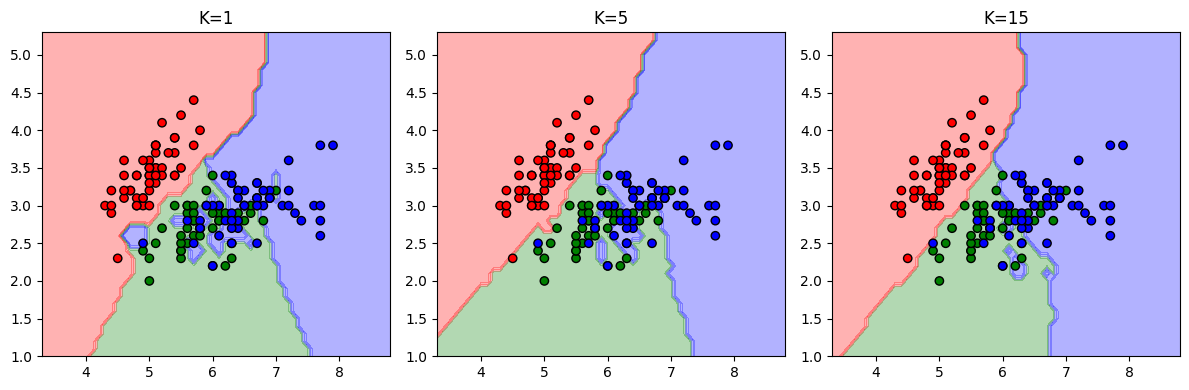

In [ ]:
# 24. Train KNN Classifier with different K values and visualize decision boundaries (2D for visualization)
X_vis, y_vis = iris.data[:, :2], iris.target  # take only 2 features
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

plt.figure(figsize=(12, 4))
for i, k in enumerate([1, 5, 15]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_v, y_train_v)

    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(f'K={k}')

plt.tight_layout()
plt.show()


In [ ]:
# 25. Apply Feature Scaling and compare results with unscaled data
scaler = StandardScaler()

# Without Scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With Scaling
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = knn_scaled.predict(X_test_s)
acc_scaled = accuracy_score(y_test_s, y_pred_scaled)

print("Accuracy without Scaling:", acc_unscaled)
print("Accuracy with Scaling:", acc_scaled)


Accuracy without Scaling: 1.0
Accuracy with Scaling: 1.0


In [ ]:
# 26. Train a PCA model on synthetic data and print explained variance ratio
X_syn, _ = make_classification(n_samples=100, n_features=5, random_state=42)
scaler = StandardScaler()
X_syn_scaled = scaler.fit_transform(X_syn)

pca = PCA(n_components=5)
pca.fit(X_syn_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [5.27245781e-01 2.74245035e-01 1.98509184e-01 9.55630868e-17
 0.00000000e+00]


In [ ]:
# 27. Apply PCA before KNN and compare accuracy
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)

print("KNN Accuracy with PCA:", accuracy_score(y_test_pca, y_pred_pca))
print("KNN Accuracy without PCA:", acc_scaled)


KNN Accuracy with PCA: 0.9555555555555556
KNN Accuracy without PCA: 1.0


In [ ]:
# 28. Perform Hyperparameter Tuning on KNN using GridSearchCV
param_grid = {'n_neighbors': range(1, 20)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_s, y_train_s)

print("Best K:", grid.best_params_['n_neighbors'])
print("Best Accuracy:", grid.best_score_)


Best K: 1
Best Accuracy: 0.9428571428571428


In [ ]:
# 29. Train a KNN Classifier and check number of misclassified samples
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
misclassified = np.sum(y_pred != y_test)

print("Number of misclassified samples:", misclassified)


Number of misclassified samples: 0


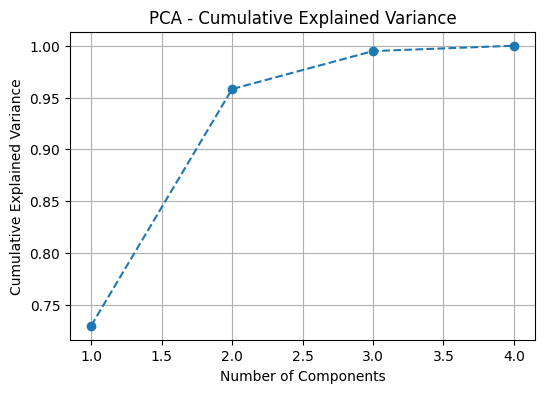

In [ ]:
# 30. Train PCA and visualize cumulative explained variance
pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance)
weights_options = ['uniform', 'distance']
for weight in weights_options:
    knn = KNeighborsClassifier(n_neighbors=3, weights=weight)
    knn.fit(X_train_s, y_train_s)
    y_pred = knn.predict(X_test_s)
    print(f"Accuracy with weights='{weight}':", accuracy_score(y_test_s, y_pred))


Accuracy with weights='uniform': 1.0
Accuracy with weights='distance': 1.0


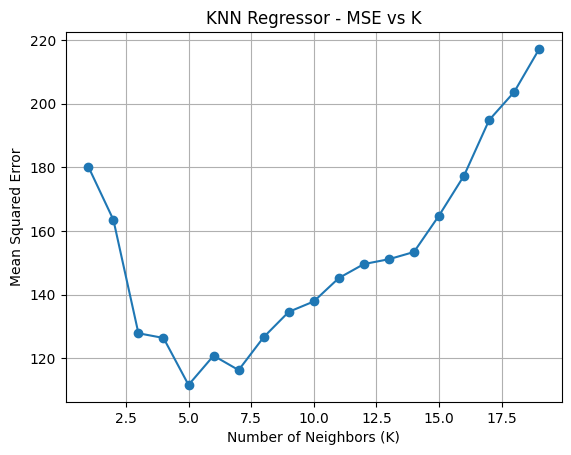

In [ ]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance
k_values = range(1, 20)
mse_list = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_list.append(mse)

plt.plot(k_values, mse_list, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regressor - MSE vs K")
plt.grid(True)
plt.show()


In [ ]:
# 33. Implement KNN Imputation for handling missing values in a dataset
from sklearn.impute import KNNImputer

# Add missing values to iris dataset
X_missing = X.copy()
rng = np.random.RandomState(42)
missing_mask = rng.rand(*X_missing.shape) < 0.1
X_missing[missing_mask] = np.nan

# Impute
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

print("Missing values before imputation:", np.isnan(X_missing).sum())
print("Missing values after imputation:", np.isnan(X_imputed).sum())


Missing values before imputation: 72
Missing values after imputation: 0


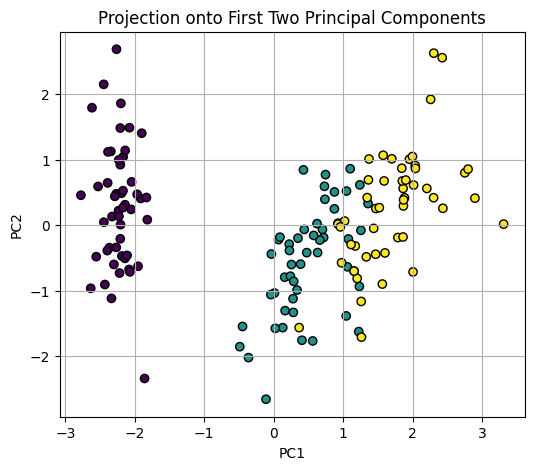

In [ ]:
# 34. Train PCA and visualize data projected onto the first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection onto First Two Principal Components')
plt.grid(True)
plt.show()


In [ ]:
# 35. Train a KNN Classifier using KD Tree and Ball Tree algorithms and compare performance
for algo in ['kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(algorithm=algo, n_neighbors=3)
    knn.fit(X_train_s, y_train_s)
    y_pred = knn.predict(X_test_s)
    print(f"Accuracy using {algo}:", accuracy_score(y_test_s, y_pred))


Accuracy using kd_tree: 1.0
Accuracy using ball_tree: 1.0


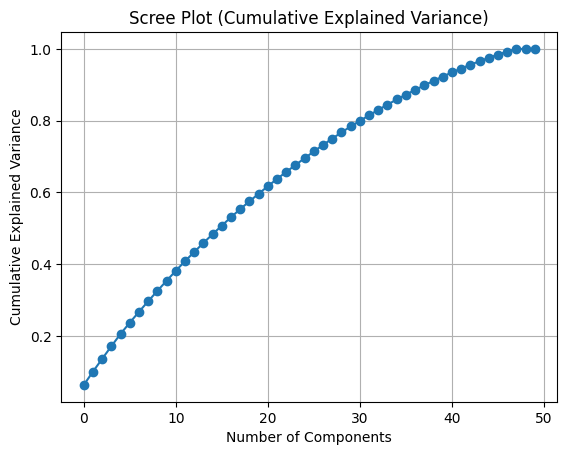

In [ ]:
# 36. Train a PCA model on high-dimensional data and visualize Scree plot
X_hd, _ = make_classification(n_samples=300, n_features=50, random_state=42)
X_hd_scaled = StandardScaler().fit_transform(X_hd)

pca_hd = PCA().fit(X_hd_scaled)
explained_var = pca_hd.explained_variance_ratio_

plt.plot(np.cumsum(explained_var), marker='o')
plt.title("Scree Plot (Cumulative Explained Variance)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
# 37. Train a KNN Classifier and evaluate Precision, Recall, and F1-Score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_s, y_train_s)
y_pred = knn.predict(X_test_s)

print("Classification Report:")
print(classification_report(y_test_s, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



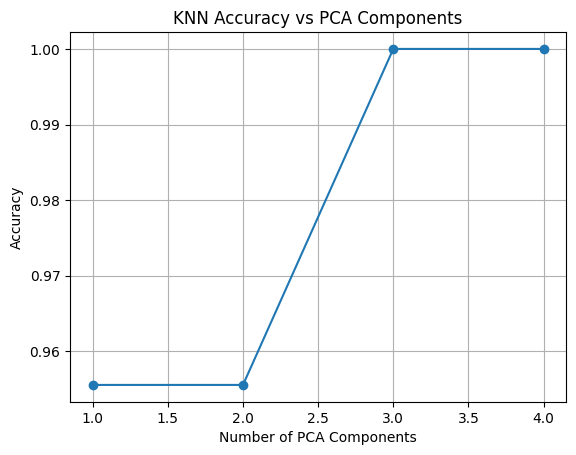

In [ ]:
# 38. Train a PCA model and analyze effect of different numbers of components on KNN accuracy
accuracies = []
components = range(1, 5)

for n in components:
    pca = PCA(n_components=n)
    X_pca_n = pca.fit_transform(X_scaled)
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_pca_n, y, test_size=0.3, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_n, y_train_n)
    acc = accuracy_score(y_test_n, knn.predict(X_test_n))
    accuracies.append(acc)

plt.plot(components, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs PCA Components")
plt.grid(True)
plt.show()


In [ ]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy
leaf_sizes = [10, 20, 30, 50]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf)
    knn.fit(X_train_s, y_train_s)
    y_pred = knn.predict(X_test_s)
    print(f"Leaf Size = {leaf}, Accuracy = {accuracy_score(y_test_s, y_pred)}")


Leaf Size = 10, Accuracy = 1.0
Leaf Size = 20, Accuracy = 1.0
Leaf Size = 30, Accuracy = 1.0
Leaf Size = 50, Accuracy = 1.0


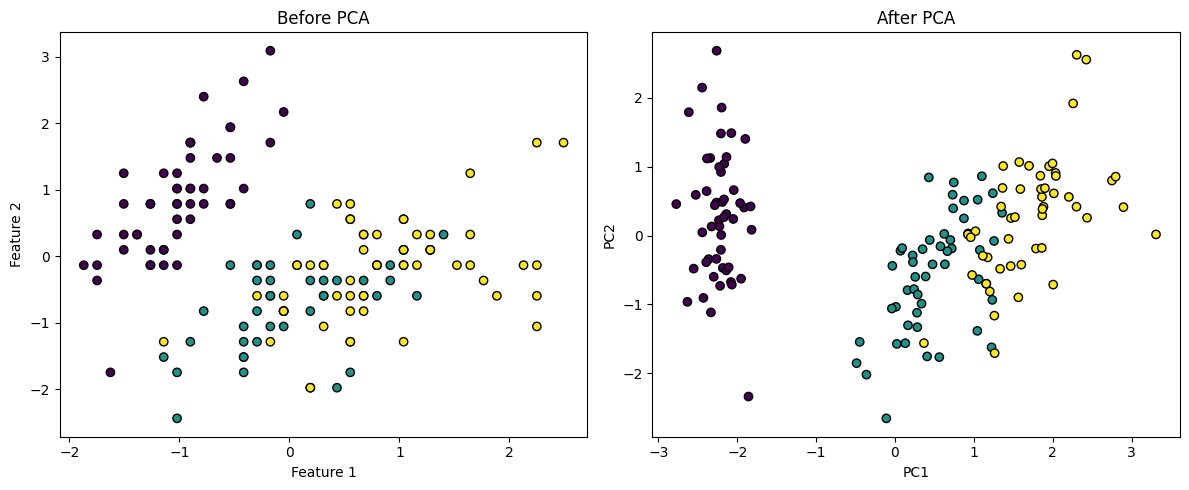

In [ ]:
# 40. Train a PCA model and visualize transformation before and after PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before PCA
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k')
ax1.set_title("Before PCA")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# After PCA
ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k')
ax2.set_title("After PCA")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.tight_layout()
plt.show()


In [44]:
# Imports (add this if not already at top of notebook)
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns


In [ ]:
# 41. Train a KNN Classifier on the Wine dataset and print classification report
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_w, y_train_w)
y_pred_w = knn.predict(X_test_w)

print("Classification Report (Wine dataset):")
print(classification_report(y_test_w, y_pred_w, target_names=wine.target_names))


Classification Report (Wine dataset):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
# 42. Train a KNN Regressor and analyze effect of different distance metrics on prediction error
metrics = {'euclidean': 2, 'manhattan': 1}
for name, p in metrics.items():
    knn_reg = KNeighborsRegressor(n_neighbors=5, p=p)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred = knn_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"{name.capitalize()} Distance - MSE:", mse)


Euclidean Distance - MSE: 111.59369913203088
Manhattan Distance - MSE: 111.59369913203088


ROC-AUC Score: 0.9536


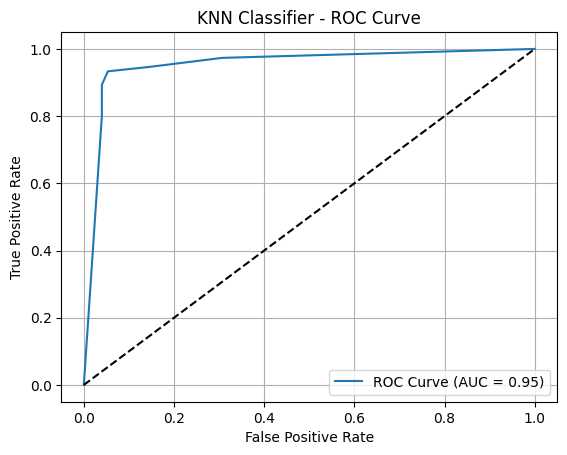

In [ ]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score (Binary classification example)
X_bin, y_bin = make_classification(n_samples=500, n_classes=2, n_features=5, random_state=42)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bin, y_train_bin)
y_prob = knn.predict_proba(X_test_bin)[:, 1]

roc_auc = roc_auc_score(y_test_bin, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Classifier - ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


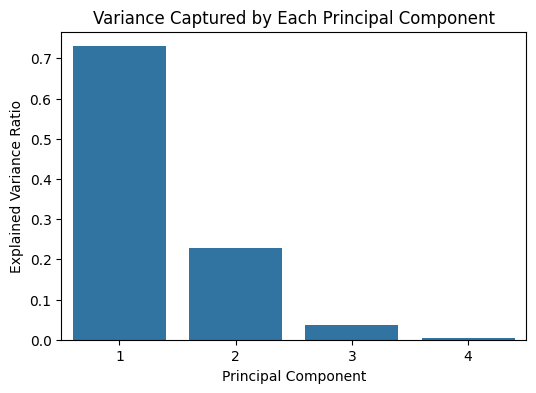

In [ ]:
# 44. Train a PCA model and visualize the variance captured by each principal component
pca = PCA().fit(X_scaled)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
sns.barplot(x=np.arange(1, len(explained_var)+1), y=explained_var)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Captured by Each Principal Component")
plt.show()


In [ ]:
# 45. Train a KNN Classifier and perform feature selection before training
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_selected, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_fs, y_train_fs)
y_pred_fs = knn.predict(X_test_fs)

print("Accuracy after Feature Selection:", accuracy_score(y_test_fs, y_pred_fs))


Accuracy after Feature Selection: 1.0


In [ ]:
# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)

print("Reconstruction Error (MSE) with 2 components:", reconstruction_error)


Reconstruction Error (MSE) with 2 components: 0.0418679279999836


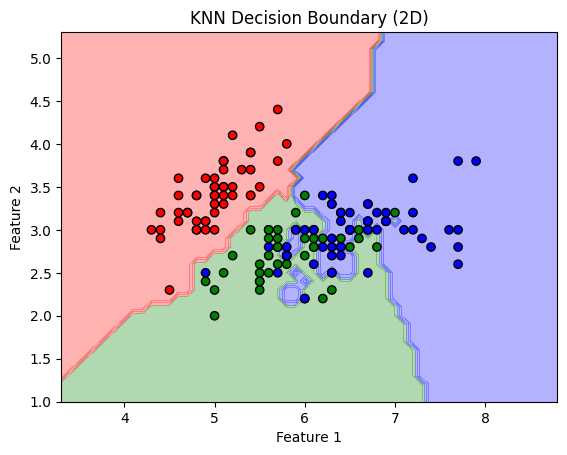

In [ ]:
# 47. Train a KNN Classifier and visualize decision boundary (2D only)
X_2d, y_2d = iris.data[:, :2], iris.target
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2d, y_train_2d)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary (2D)')
plt.show()


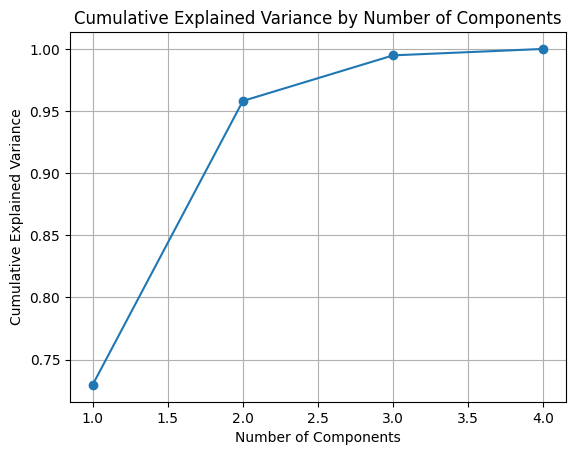

In [ ]:
# 48. Train PCA and analyze the effect of number of components on data variance
pca = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()
